In [62]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('US_Accidents_Dec21_updated.csv')

<ipython-input-6-2e20cde7d20e>:1: DtypeWarning: Columns (31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('US_Accidents_Dec21_updated.csv')


In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.dtypes.value_counts()

object     32
float64    13
int64       1
bool        1
Name: count, dtype: int64

In [ ]:
df.shape

(28703, 47)

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,28703.000000,28703.000000,28703.000000,28703.000000,28703.000000,28703.000000,3931.000000,27799.000000,4094.000000,27779.000000,27843.000000,27768.000000,24137.000000,2495.000000
mean,2.328433,35.769227,-104.180112,35.769418,-104.180042,0.705901,8435.448232,62.806709,23.376502,64.323914,29.997684,9.357883,9.388851,0.039511
std,0.589223,4.439594,12.325670,4.439713,12.325852,1.930208,12278.713527,18.655740,18.665003,21.241528,0.247503,3.055244,8.776565,0.102450
min,2.000000,26.218240,-123.526160,26.209870,-123.526160,0.000000,1.000000,-18.000000,-34.700000,4.000000,20.670000,0.000000,0.000000,0.000000
25%,2.000000,32.794205,-118.093265,32.794270,-118.092620,0.190000,1708.000000,55.000000,11.100000,49.000000,29.900000,10.000000,5.800000,0.000000
50%,2.000000,34.103150,-96.935410,34.102784,-96.935490,0.424000,4824.000000,64.900000,24.800000,65.000000,29.990000,10.000000,8.100000,0.000000
75%,3.000000,38.802390,-94.819750,38.802420,-94.818265,0.695000,11049.000000,75.000000,34.900000,81.000000,30.100000,10.000000,11.500000,0.030000
max,4.000000,48.125360,-80.005270,48.122370,-79.958150,151.525000,330991.000000,129.200000,101.000000,100.000000,30.920000,111.000000,822.800000,1.310000


In [ ]:
df.State.unique

<bound method Series.unique of 0        OH
1        OH
2        OH
3        OH
4        OH
         ..
28698    MS
28699    MS
28700    TX
28701    CO
28702    TX
Name: State, Length: 28703, dtype: object>

In [ ]:
df_USA=df[df['State']=='CA']

In [ ]:
df_USA['IDD'] = df_USA['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

<ipython-input-19-dfa761f8c5c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA['IDD'] = df_USA['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [ ]:
df_USA

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
988,A-989,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,Day,Day,Day,Day,989
989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,Day,Day,Day,Day,990
990,A-991,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,991
991,A-992,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,992
992,A-993,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,Night,Night,Night,Night,993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11779,A-11780,4,2016-06-20 11:44:32,2016-06-20 18:44:32,34.178860,-117.882090,34.239110,-117.851310,4.519,Closed between Silverfish and Glendora - Road ...,...,False,False,False,False,False,Day,Day,Day,Day,11780
11780,A-11781,4,2016-06-20 11:44:32,2016-06-20 18:44:32,34.239110,-117.851310,34.178860,-117.882090,4.519,Closed between Glendora and Silverfish - Road ...,...,False,False,False,False,False,Day,Day,Day,Day,11781
11781,A-11782,2,2016-06-20 14:35:53,2016-06-20 20:35:53,34.145390,-118.368710,34.143994,-118.367857,0.108,At Lankershim Blvd/Exit 12A - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,11782
11782,A-11783,2,2016-06-20 14:44:48,2016-06-20 20:44:48,34.155740,-118.289767,34.154406,-118.288097,0.133,At CA-134/Ventura Fwy - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,11783


In [ ]:
df_USA.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
988,A-989,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,Day,Day,Day,Day,989
989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,Day,Day,Day,Day,990
990,A-991,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,991
991,A-992,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,992
992,A-993,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,Night,Night,Night,Night,993


In [ ]:
df_USA.shape

(10792, 48)

In [ ]:
df_USA.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'IDD'],
      dtype='object')

In [ ]:
df_USA.duplicated().sum()

0

In [ ]:
d1f=df_USA.dropna(subset=['Precipitation(in)'])

In [ ]:
f1=df_USA.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])

In [ ]:
df_USA.shape

(10792, 48)

In [ ]:
df_USA.isna().sum()/len(df_USA)*100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   84.553373
Street                    0.000000
Side                      0.000000
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.055597
Country                   0.000000
Timezone                  0.055597
Airport_Code              0.064863
Weather_Timestamp         0.908080
Temperature(F)            1.269459
Wind_Chill(F)            98.332098
Humidity(%)               1.334322
Pressure(in)              1.204596
Visibility(mi)            1.575241
Wind_Direction            0.917346
Wind_Speed(mph)          17.346182
Precipitation(in)   

In [ ]:
df_USA=df_USA.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [ ]:
df_USA.isna().sum()/len(df_USA)*100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   84.553373
Street                    0.000000
Side                      0.000000
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.055597
Country                   0.000000
Timezone                  0.055597
Airport_Code              0.064863
Weather_Timestamp         0.908080
Temperature(F)            1.269459
Wind_Chill(F)            98.332098
Humidity(%)               1.334322
Pressure(in)              1.204596
Visibility(mi)            1.575241
Wind_Direction            0.917346
Wind_Speed(mph)          17.346182
Precipitation(in)   

In [ ]:
df_USA['Weather_Condition'].value_counts()

Weather_Condition
Clear                           4850
Overcast                        1573
Mostly Cloudy                   1381
Partly Cloudy                   1149
Scattered Clouds                1088
Haze                             329
Light Rain                       146
Fair                              67
Rain                              17
Cloudy                            15
Snow                               8
Fog                                7
Light Drizzle                      5
Smoke                              5
Mist                               4
Rain Showers                       3
Heavy Drizzle                      3
Heavy Rain                         2
Light Snow                         2
Patches of Fog                     1
Light Thunderstorms and Rain       1
Light Rain Showers                 1
Drizzle                            1
Name: count, dtype: int64

In [ ]:
df_USA.Side.unique()

array(['L', 'R'], dtype=object)

In [ ]:
df_cat=df_USA.select_dtypes('object')
df_num=df_USA.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [ ]:
df_cat=df_USA.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,10792
1,Start_Time,8962
2,End_Time,8945
3,Description,5148
4,Street,1665
5,Side,2
6,City,596
7,County,45
8,State,1
9,Zipcode,1797


In [ ]:
df_USA.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [ ]:
del df_USA['Airport_Code']

In [ ]:
df_num.columns


Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'IDD'],
      dtype='object')

In [ ]:
len(df_num.columns)

15

In [ ]:
df_cat.columns

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len(df['City'].unique())

1692

In [ ]:
df_num=df_USA.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Severity,3
1,Start_Lat,7073
2,Start_Lng,7196
3,End_Lat,7058
4,End_Lng,7169
5,Distance(mi),1585
6,Number,1348
7,Temperature(F),233
8,Wind_Chill(F),74
9,Humidity(%),97


<Axes: >

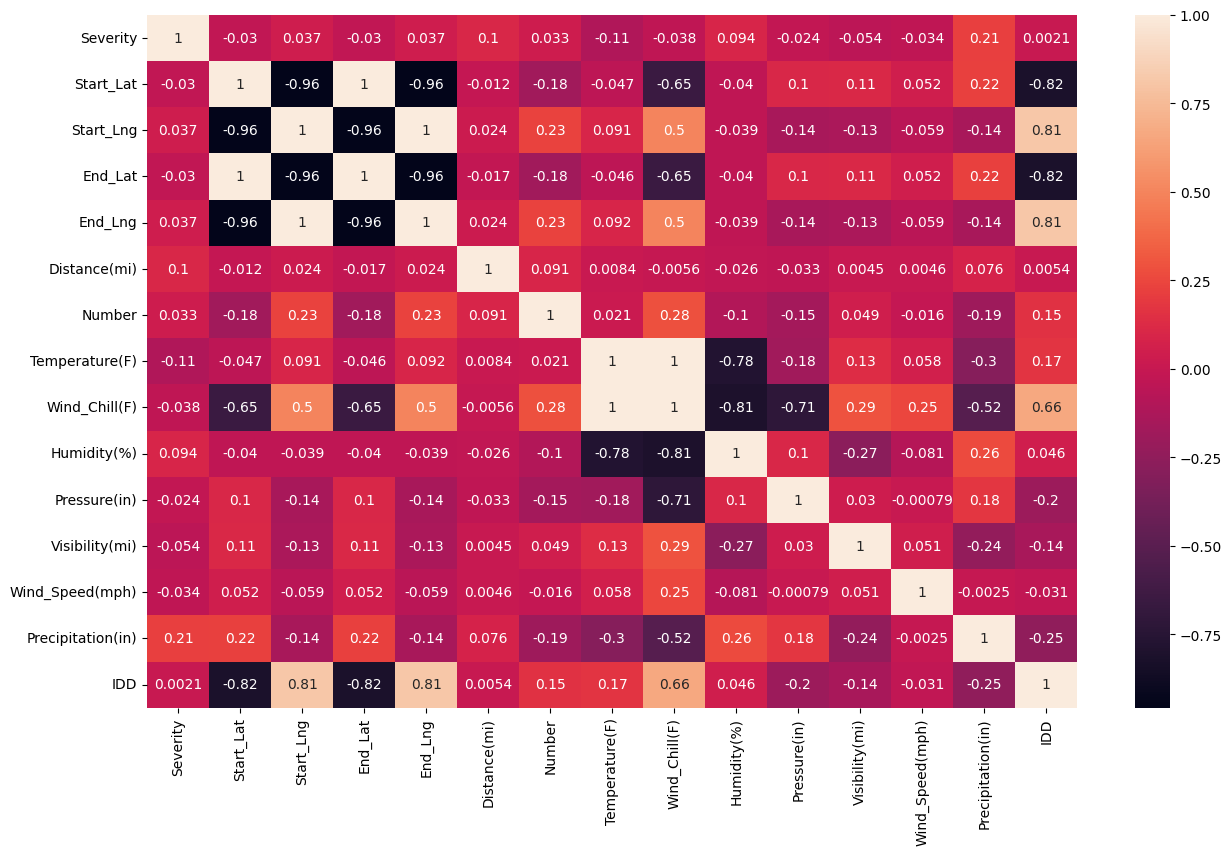

In [ ]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [ ]:
accidents_by_cities = df_USA['City'].value_counts()
accidents_by_cities

City
Los Angeles      1077
San Diego         406
Sacramento        398
San Jose          367
Oakland           190
                 ... 
Penn Valley         1
Mammoth Lakes       1
Stratford           1
Pollock Pines       1
Pioneer             1
Name: count, Length: 596, dtype: int64

In [ ]:
accidents_by_cities[:10]

City
Los Angeles      1077
San Diego         406
Sacramento        398
San Jose          367
Oakland           190
Long Beach        167
Riverside         157
San Francisco     150
Corona            133
Anaheim           133
Name: count, dtype: int64

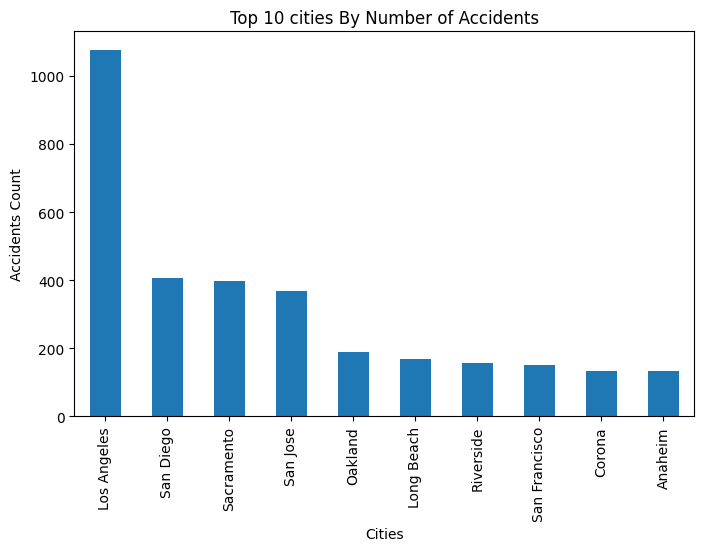

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [ ]:
df_USA['Start_Time'].dtype

dtype('O')

In [ ]:
df_USA['Start_Time'] = pd.to_datetime(df_USA['Start_Time'])

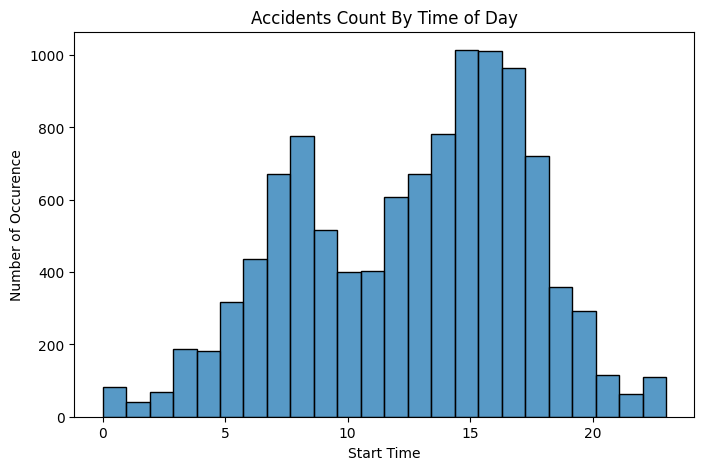

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df_USA['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

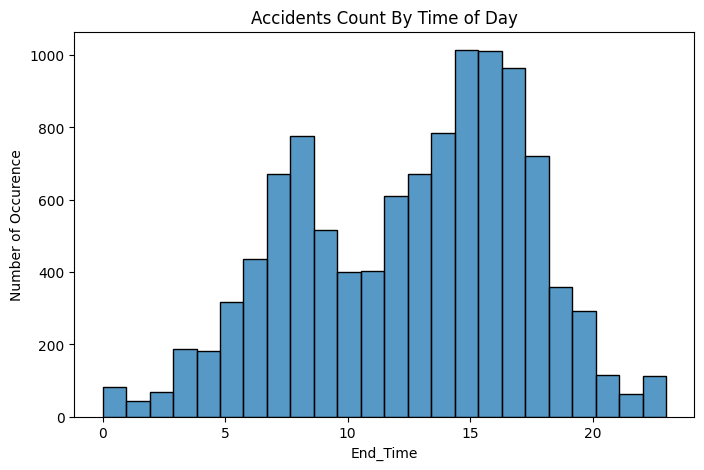

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df_USA['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()